ALGERIAN FOREST DATASET

RH = Relative Humidity
Ws = Wind Speed
Rain: total day in mm : 0 to 16.8 wi components
Fine Fuel Moisture Code: index from FWI System: 28.6 to 92.5
Drought Code (DC)
Initial Spread Index (ISC)
Buildup Index (BUI)
Fire Weather Index (FWI)
Classes: two classes namely fire and not Fire

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


Data Cleaning

In [6]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
## missing values
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


On Observing , The dataset is converted into two sets based on Region from 122th index, we can make a new column based on   the region

In [8]:
df.loc[:122 , 'Region'] = 0
df.loc[122: , 'Region'] = 1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [11]:
df[["Region"]] = df[['Region']].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [21]:
## Dataset contains data of 2 diff region as done above
##1:= "bajai region dataset"
##2 :- "siddi - Bel abbes Region dataset"

In [22]:
## Removing Nulll Values
df = df.dropna().reset_index(drop = True)

In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [24]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [25]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [26]:
## Removing the 122nd row
df = df.drop(122).reset_index(drop = True)

In [27]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [28]:
df.columns ## See some extra spaces in column Name

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [30]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Change the Required Column as integer Datatype

In [32]:
df[['day' , 'month' , 'year' , 'Temperature' , 'RH' , 'Ws']] = df[['day' , 'month' , 'year' , 'Temperature' , 'RH' , 'Ws']].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [38]:
df.describe()


,day,month,year,Temperature,RH,Ws,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,1.000000


In [39]:
df.corr()

/tmp/ipykernel_154/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,day,month,year,Temperature,RH,Ws,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,-0.181160
Region,0.000821,0.001857,NaN,0.269555,-0.402682,-0.181160,1.000000


In [42]:
objects = [features for features in df.columns if df[features].dtype == '0']
         

In [43]:
objects

[]

In [46]:
for i in objects :
    if i != 'Classes':
        df[i] = df[i].astype(int)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [48]:
objects

[]

In [49]:
df.describe()

,day,month,year,Temperature,RH,Ws,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,1.000000


In [50]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [51]:
## Let ave the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index = 'False')

Exploratory data Analysis

In [52]:
## drop day, month and year
df_copy = df.drop(['day' , 'month' , 'year'], axis = 1)

In [53]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [54]:
df_copy['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [56]:
## Encoding of the Values in Classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire') , 0 ,1)

In [57]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0


In [58]:
df_copy.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0


In [59]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [60]:
df_copy["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [ ]:
## Now Clean and Clear

/tmp/ipykernel_154/2350010311.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


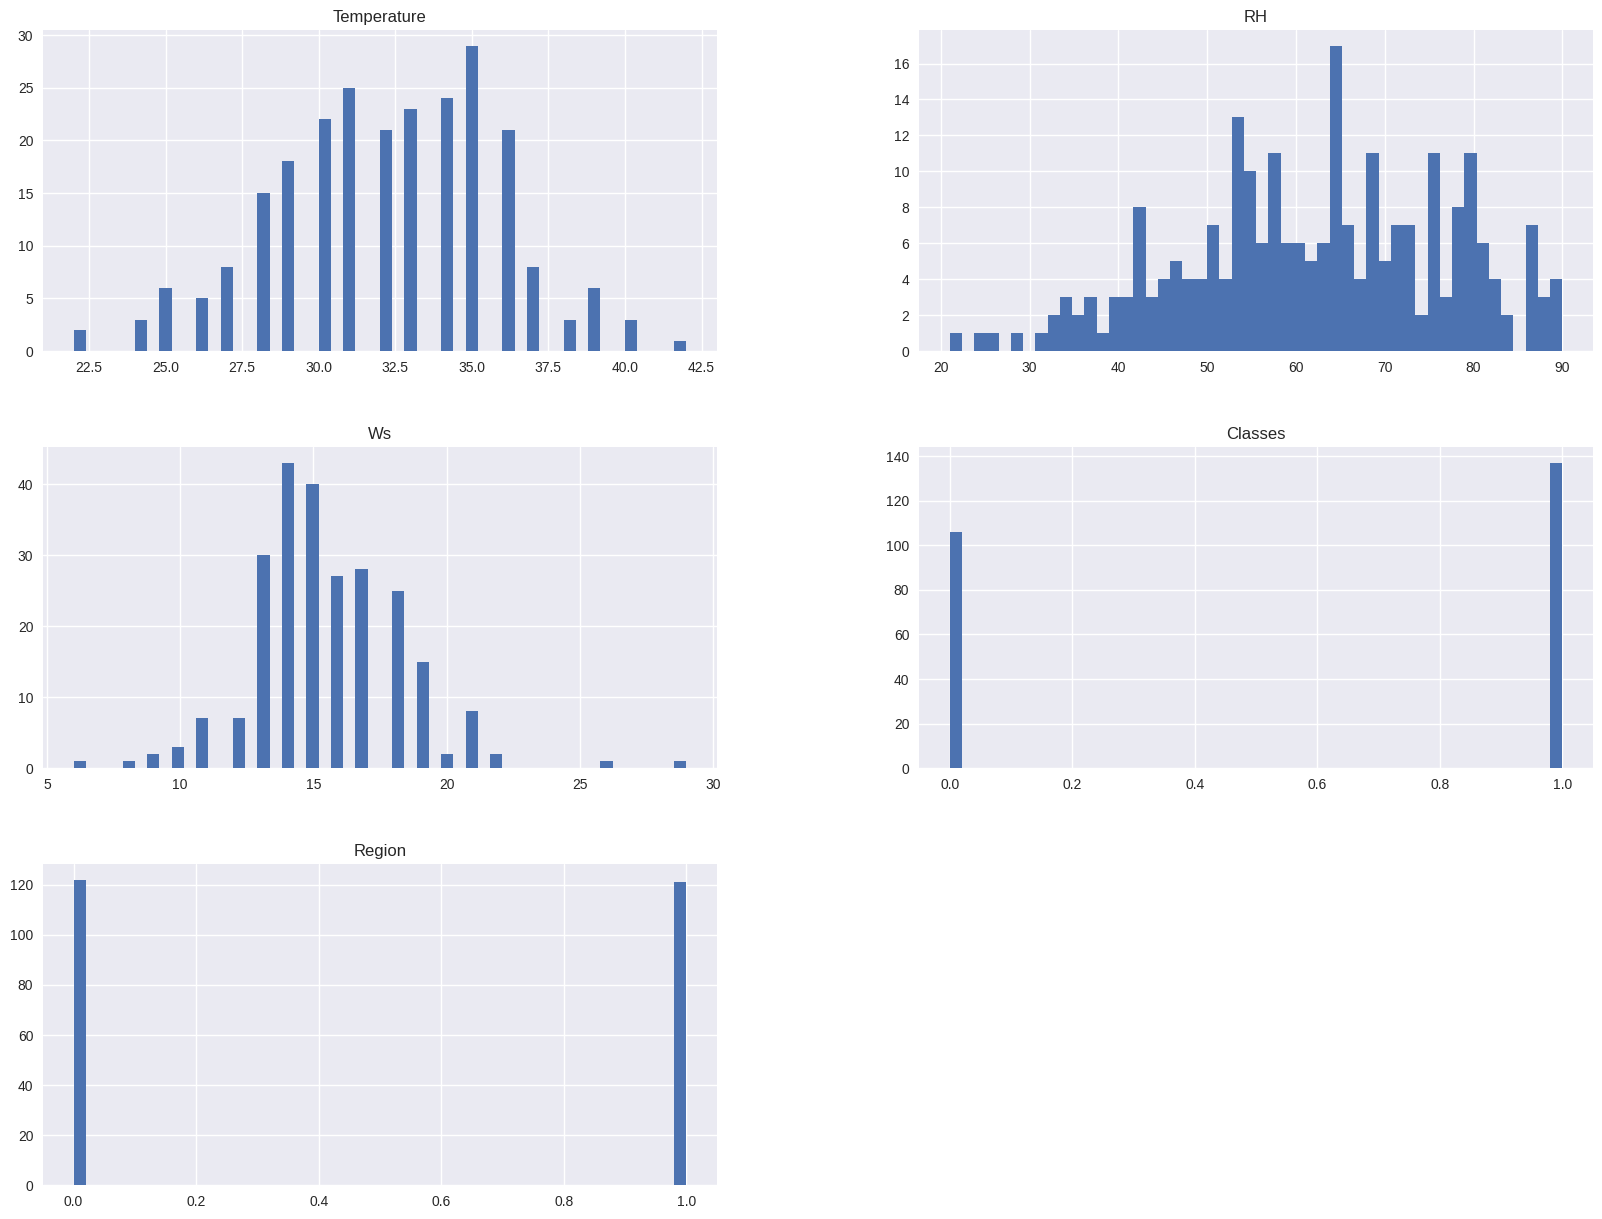

In [63]:
## Plot density Plot for all Features
plt.style.use('seaborn')
df_copy.hist(bins = 50, figsize = (20, 15))
plt.show()

In [65]:
## Percent for Pie chart

percentage = df_copy['Classes'].value_counts(normalize = True)*100


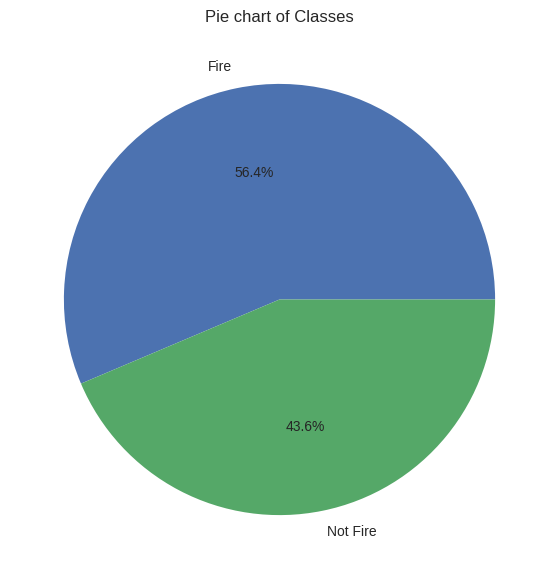

In [69]:
## 
classlabels = ['Fire' ,'Not Fire']
plt.figure(figsize = (12,7))
plt.pie(percentage , labels = classlabels, autopct = "%1.1f%%" )
plt.title("Pie chart of Classes")
plt.show()

Correlation

In [70]:
df_copy.corr()

/tmp/ipykernel_154/382007831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,Temperature,RH,Ws,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,-0.069964,-0.181160
Classes,0.516015,-0.432161,-0.069964,1.000000,0.162347
Region,0.269555,-0.402682,-0.181160,0.162347,1.000000


<AxesSubplot: >

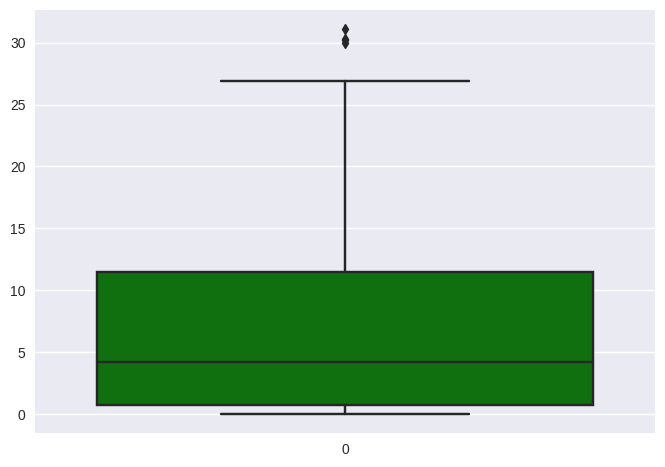

In [73]:
## Box plots
import seaborn as sns
sns.boxplot(df['FWI'] , color = 'green')

In [74]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes'] = np.where(df["Classes"].str.contains('not fire') , 'not fire' , 'fire')

In [ ]:
## Monthly Fire Analysis

dftemp = df.loc[df['Region'] == 1]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes' , data = df)
plt.ylabel('number of fires', weight = 'bold')
plt.xlabel('Months', weight = 'bold')
plt.title('Fire Analysis of Sid-Bel Regions' , weight = 'bold')